El código lo tomé de [aqui](http://adilmoujahid.com/posts/2014/07/twitter-analytics/) . Que es simplemente la página que nos mandó el profesor

In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import re

%matplotlib inline

In [7]:
tweets_data = []

tweets_file = open("twitter_data.txt", "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
        
    except:
        continue

In [9]:
tweets= pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

tweets.head()

,text,lang,country
0,RT @Margari42657683: @JorgeLuisPerd20 Estados ...,es,None
1,RT @DrRobertoMOjeda: Conmemoramos el Aniversar...,es,None
2,RT @AdamSmithFree: “Me llamo @QuinteroCalle y ...,es,None
3,@WRadioColombia @matadoreltiempo @elespectador...,und,None
4,RT @LolaVid: El Primer Secretario del Comité C...,es,None


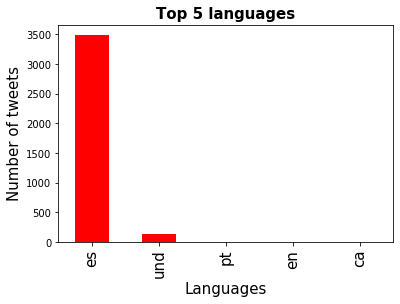

In [10]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

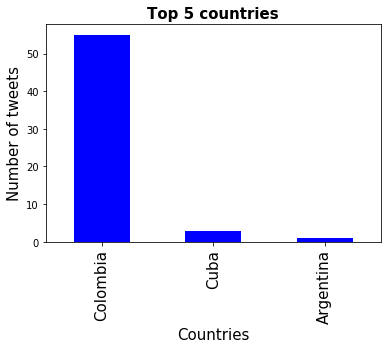

In [11]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [12]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [24]:
filters = ['DanielQuinteroAlcalde','@QuinteroCalle','#QuinteroPorMedellín', 'MedellínAdelante', '@AlfredoRamosM',"#VamosPorMás"]

for i in filters:
    tweets[i] = tweets['text'].apply(lambda tweet: word_in_text(i, tweet))
    print(tweets[i].value_counts()[True])
    
textos = tweets['text'].values

14
1624
288
18
881
150


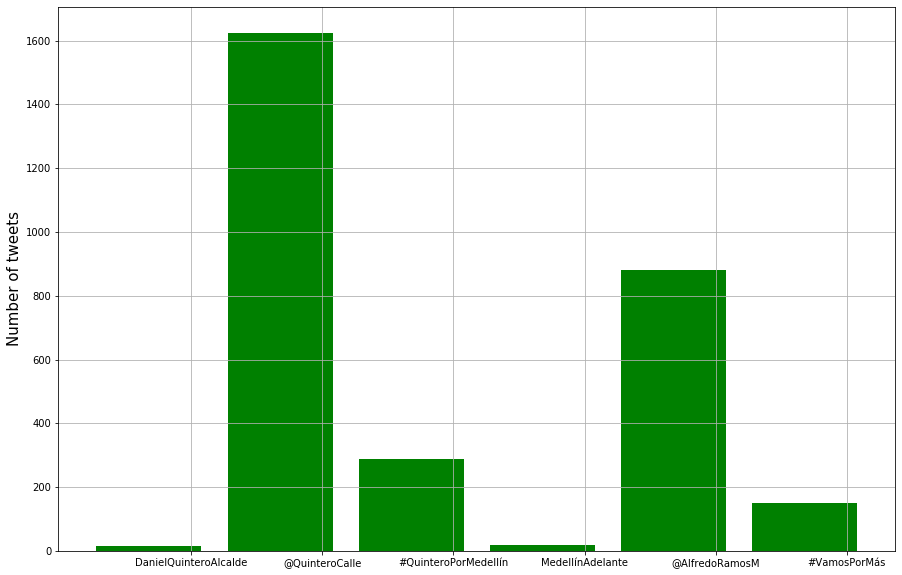

In [20]:
tweets_by_prg_lang = [tweets[i].value_counts()[True] for i in filters]

x_pos = list(range(len(filters)))
width = 0.8
fig, ax = plt.subplots(figsize = (15,10))
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
#ax.set_title('Ranking: python vs. javascript vs. ruby (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(filters)
plt.grid()

In [25]:
textos[0]

'RT @Margari42657683: @JorgeLuisPerd20 Estados Unidos sigue obsesionado con axfiar la economía de Cuba. Seguiremos en combate!!\n#somoscontin…'